Download and install all the required packages and libraries

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas.io.parsers.readers import csv
from typing_extensions import ClassVar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Input data
import opendatasets as od
od.download("https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset")



Skipping, found downloaded files in "./fake-and-real-news-dataset" (use force=True to force download)


In [ ]:
real_news = pd.read_csv('/content/fake-and-real-news-dataset/True.csv')
fake_news = pd.read_csv('/content/fake-and-real-news-dataset/Fake.csv')

In [ ]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
real_news['title'].str.len().mean()

64.667880655554

In [ ]:
fake_news['title'].str.len().mean()

94.19803245176952

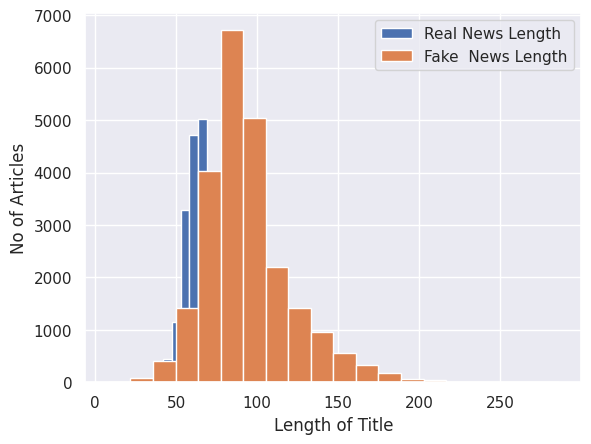

In [ ]:
plt.figure()
plt.hist(real_news['title'].str.len(), bins= 20, label='Real News Length')
plt.hist(fake_news['title'].str.len(), bins= 20,stacked= True, label='Fake  News Length')
plt.legend()
plt.xlabel('Length of Title')
plt.ylabel('No of Articles')
plt.show()


In [ ]:
real_news['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

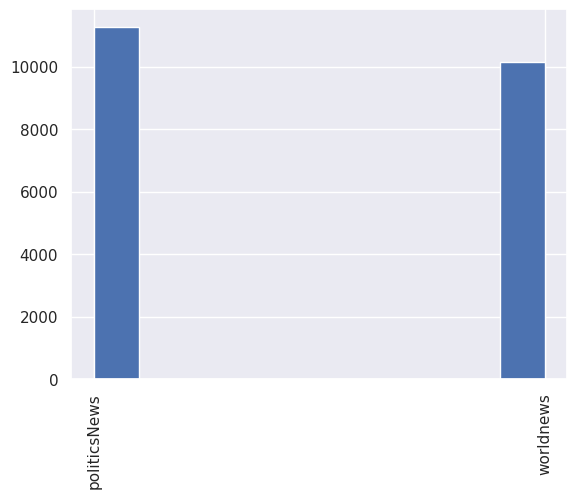

In [ ]:
plt.figure
plt.hist(real_news['subject'])
plt.xticks(rotation= 90)
plt.show()

In [ ]:
fake_news['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

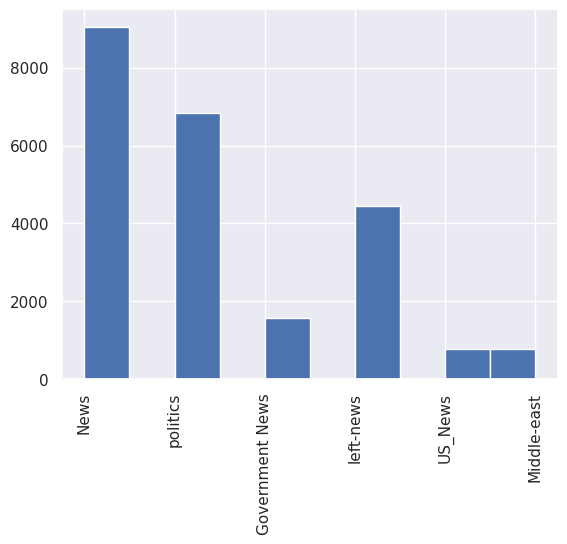

In [ ]:
plt.figure
plt.hist(fake_news['subject'])
plt.xticks(rotation= 90)
plt.show()


In [ ]:
real_news['FakeOrNot'] = 1
fake_news['FakeOrNot'] = 0
News_Dataset = pd.concat([real_news, fake_news], ignore_index=True)
News_Dataset.head()

,title,text,subject,date,FakeOrNot
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Library for NLP processing


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def cleaning (text):
  final_text= []
  re.sub('\[[^]]*\]', '', text)
  re.sub('\[^a-zA-Z]','', text)
  text=text.lower()
  text= word_tokenize(text)

  for word in text:
    if word not in set(stopwords.words('english')):
      word=WordNetLemmatizer().lemmatize(word)
      final_text.append(word)
  return " ".join(final_text)

In [ ]:
News_Dataset['title']= News_Dataset['title'].apply(cleaning)

In [ ]:
News_Dataset['title'].head(20)


0     u.s. budget fight loom , republican flip fisca...
1     u.s. military accept transgender recruit monda...
2     senior u.s. republican senator : 'let mr. muel...
3     fbi russia probe helped australian diplomat ti...
4     trump want postal service charge 'much ' amazo...
5     white house , congress prepare talk spending ,...
6     trump say russia probe fair , timeline unclear...
7     factbox : trump twitter ( dec 29 ) - approval ...
8             trump twitter ( dec 28 ) - global warming
9     alabama official certify senator-elect jones t...
10    jones certified u.s. senate winner despite moo...
11    new york governor question constitutionality f...
12    factbox : trump twitter ( dec 28 ) - vanity fa...
13      trump twitter ( dec 27 ) - trump , iraq , syria
14    man say delivered manure mnuchin protest new u...
15    virginia official postpone lottery drawing dec...
16    u.s. lawmaker question businessman 2016 trump ...
17    trump twitter ( dec 26 ) - hillary clinton

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


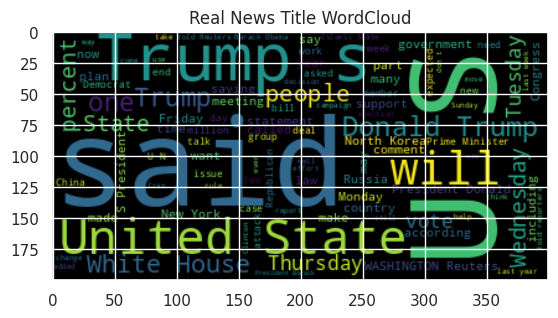

In [ ]:
from wordcloud import WordCloud, STOPWORDS
plt.figure()
wc= WordCloud(max_words=100, stopwords= STOPWORDS).generate(" ".join(News_Dataset[News_Dataset['FakeOrNot']==1]['text']))
plt.title('Real News Title WordCloud')
plt.imshow(wc, interpolation='bilinear')

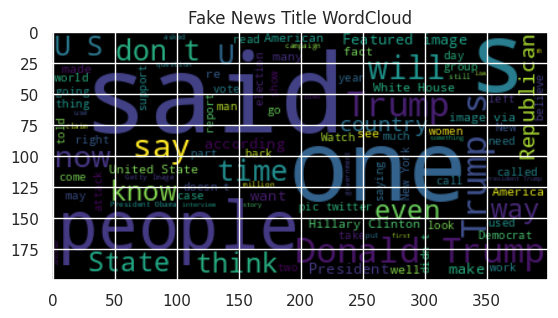

In [ ]:
from wordcloud import WordCloud, STOPWORDS
plt.figure()
wc_fake= WordCloud(max_words=100, stopwords= STOPWORDS).generate(" ".join(News_Dataset[News_Dataset['FakeOrNot']==0]['text']))
plt.title('Fake News Title WordCloud')
plt.imshow(wc_fake, interpolation='bilinear')

In [1]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

In [2]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram", n=2)


NameError: ignored

In [ ]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)